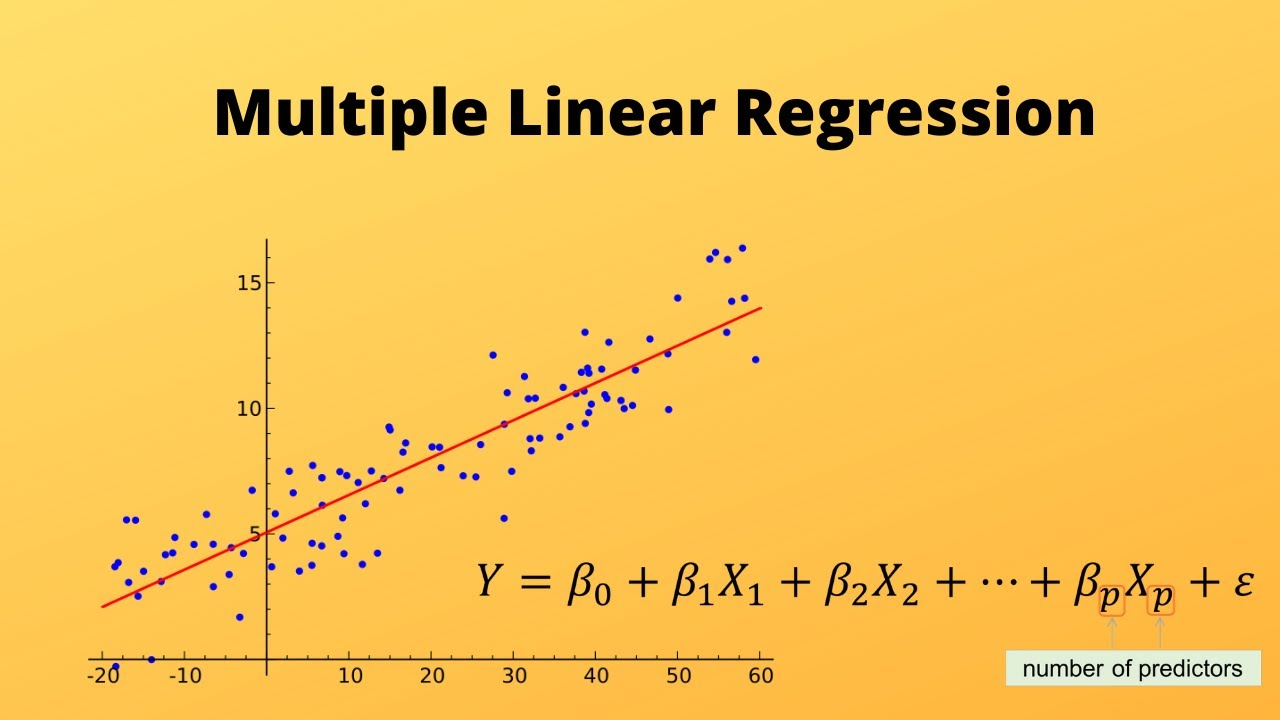

<a id=section1></f>
## Definition


Linear regression is a statistical approach for modelling relationship between a dependent variable with a given set of independent variables.
- Simple Linear Regression

Simple linear regression is an approach for predicting a response using a single feature.
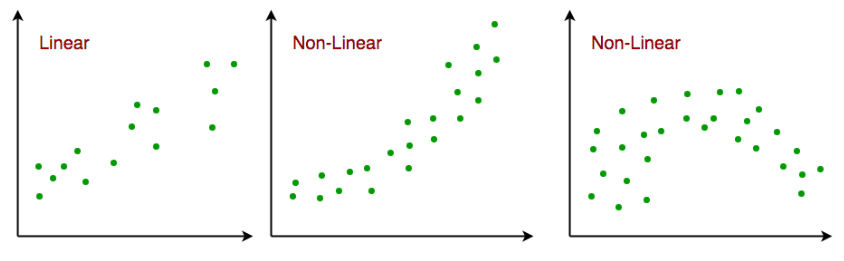

#### WHY Linear Regression?
- To find the parameters so that the model **best fits** the data.
- Forecasting an effect
- Determing a Trend
#### How do we determine the best fit line? 
- The line for which the the error between the **predicted** values and the **observed** values is minimum is called the best fit line or the regression line. These errors are also called as **residuals**. 
- The residuals can be visualized by the vertical lines from the observed data value to the **regression line**.

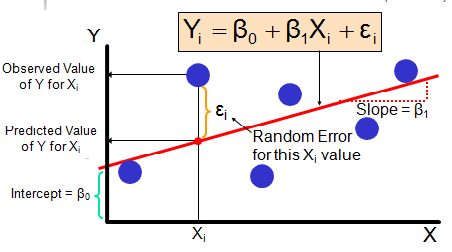



In [14]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [22]:
# ------------------- Step 1: Read the CSV File -------------------
df = pd.read_csv('FuelConsumption.csv')


df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,12.1,8.7,10.6,27,244


In [20]:
df.shape

(1067, 11)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   FUELCONSUMPTION_CITY      1067 non-null   float64
 7   FUELCONSUMPTION_HWY       1067 non-null   float64
 8   FUELCONSUMPTION_COMB      1067 non-null   float64
 9   FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 10  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 91.8+ KB


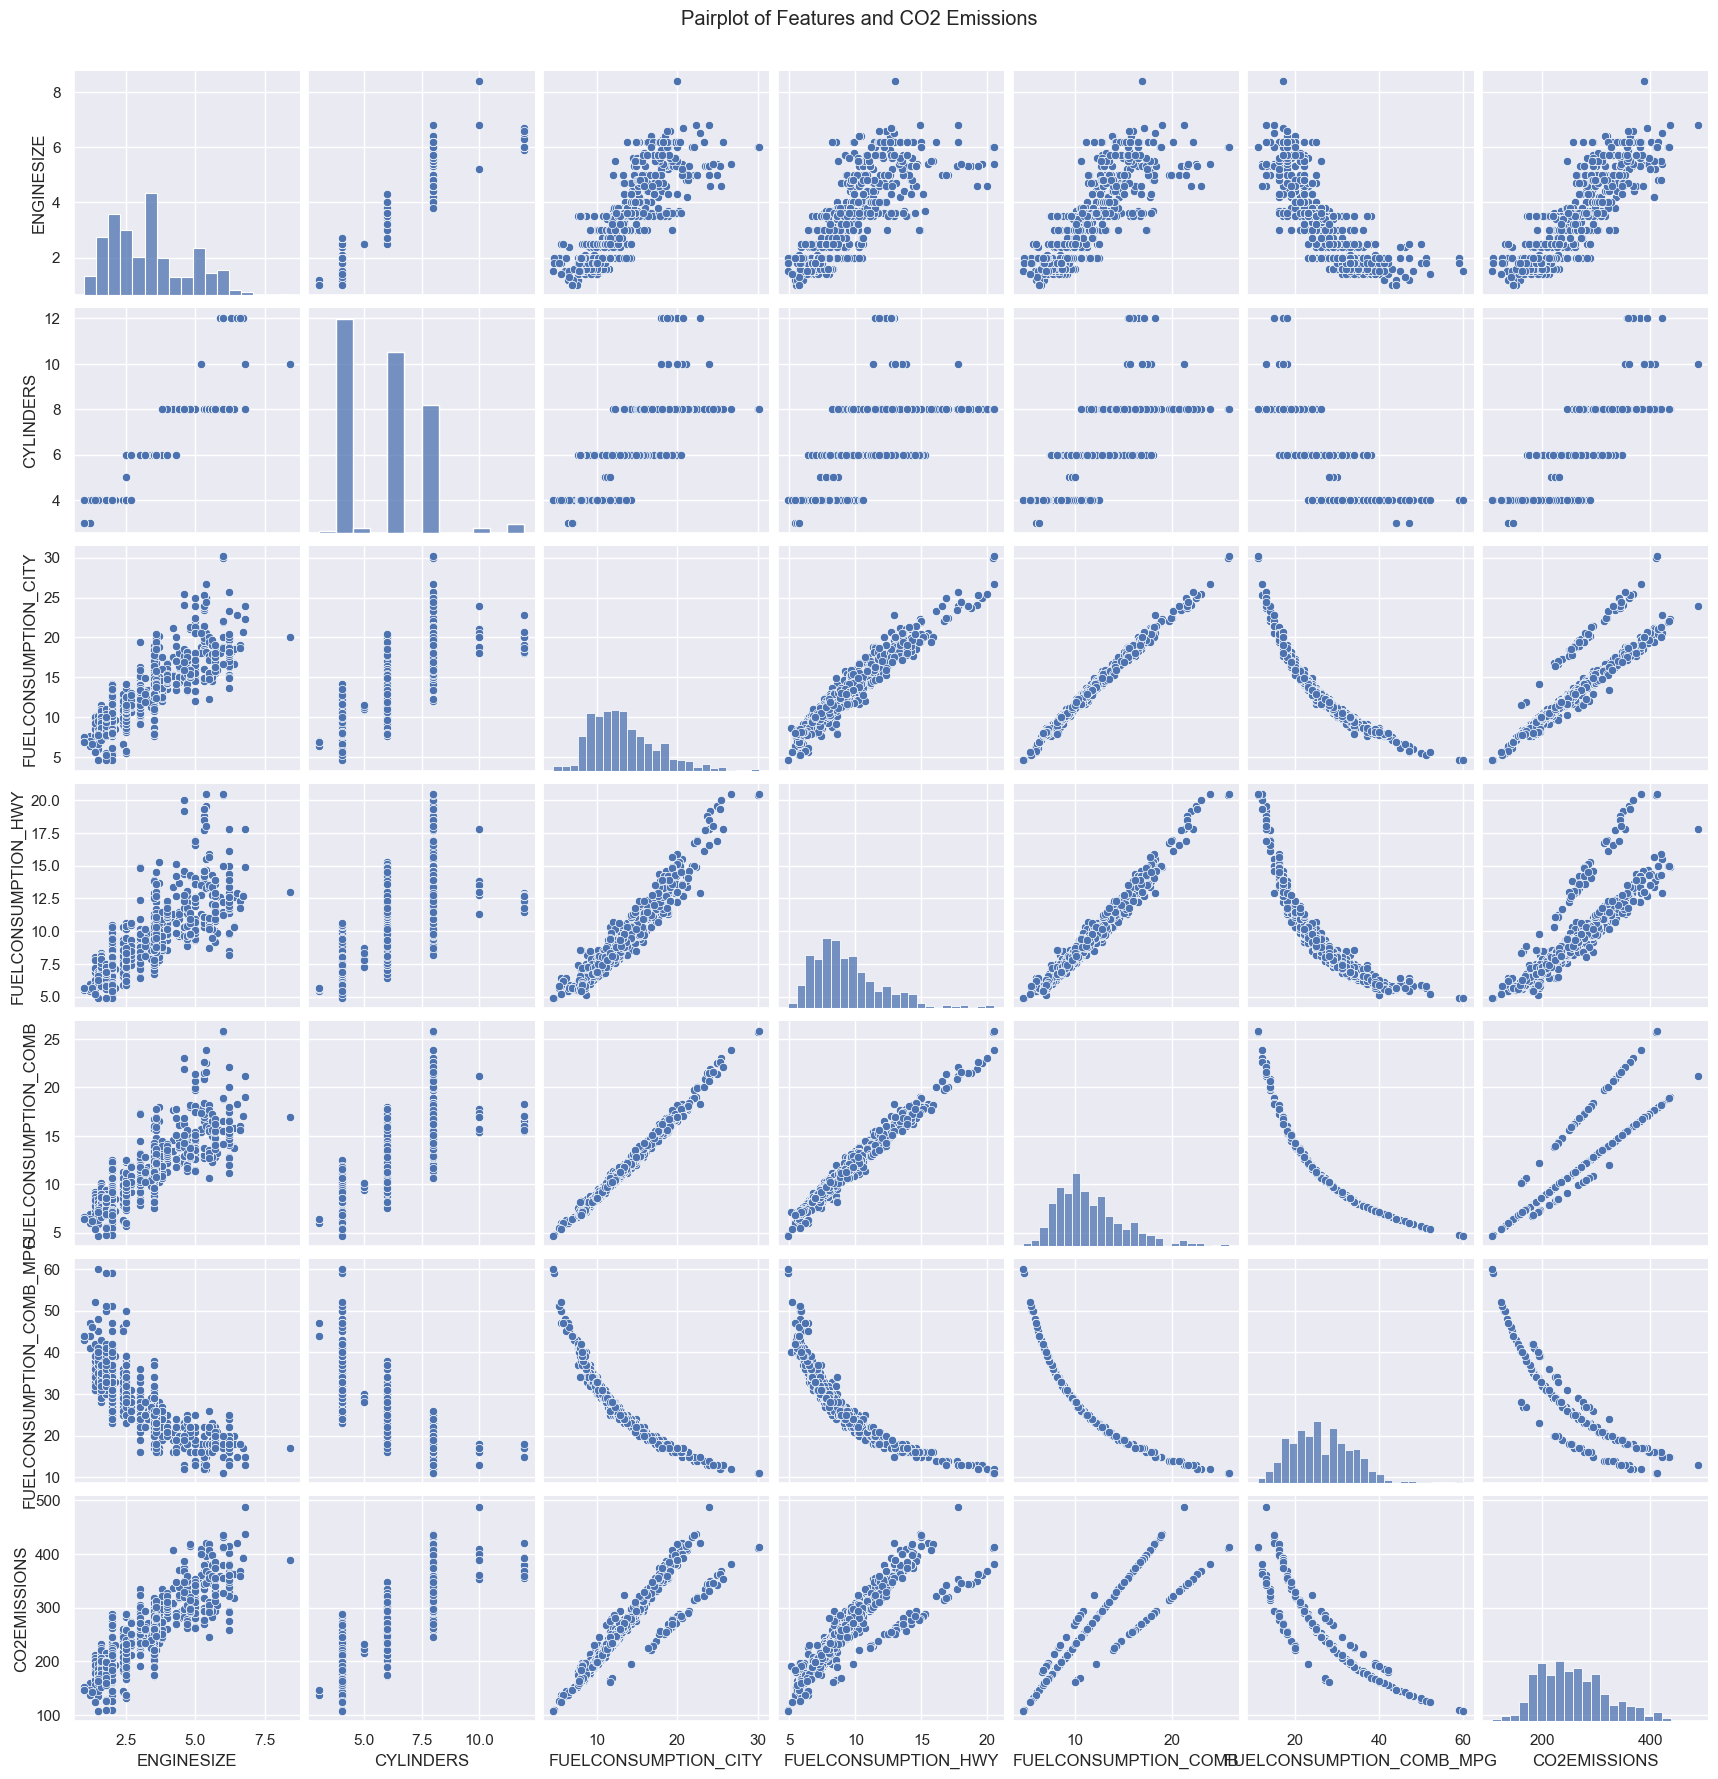

In [23]:
## Analysis to check relation via plots
sns.pairplot(df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
                 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
                 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']])
plt.suptitle("Pairplot of Features and CO2 Emissions", y=1.02)
plt.show()

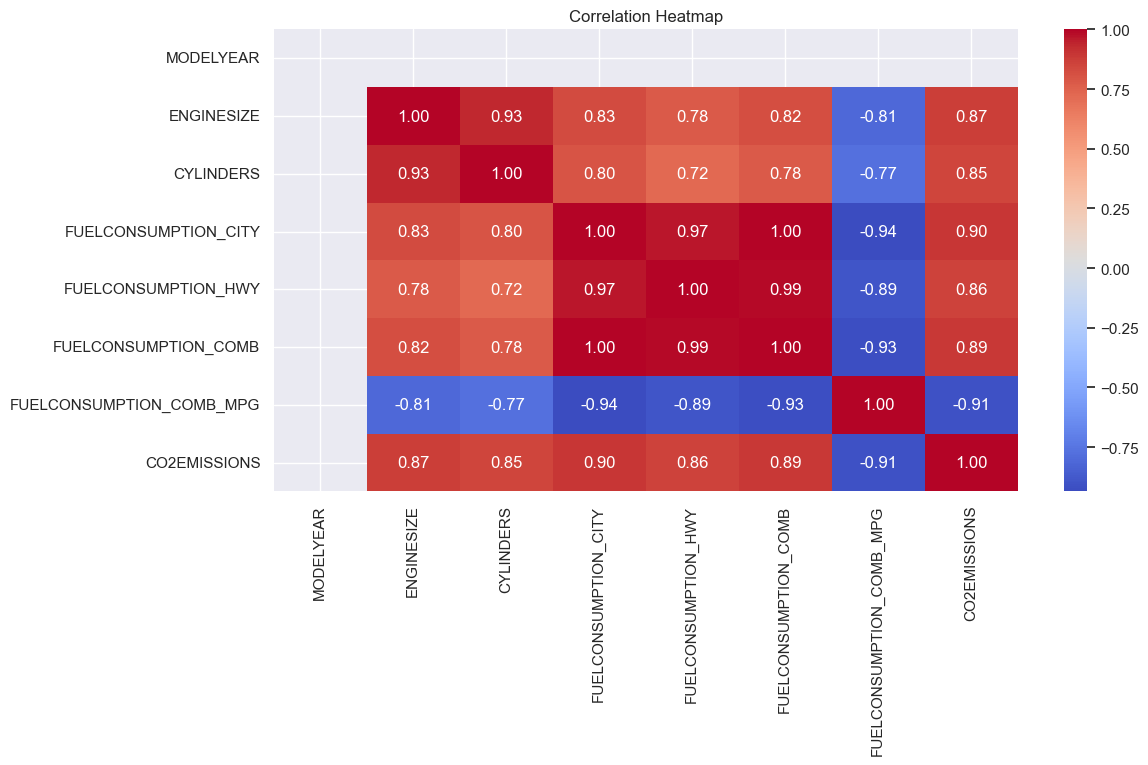

In [24]:
# ------------------- Step 4: Correlation Heatmap -------------------
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [25]:
# ------------------- Step 5: Feature Selection -------------------
features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']
X = df[features]
y = df['CO2EMISSIONS']

In [30]:
# ------------------- Step 6: Model Training with k-Fold -------------------
model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=1)

r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
neg_mse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
mse_scores = -neg_mse_scores
print("r2_scores:", r2_scores)
print("mse_scores:",mse_scores )

r2_scores: [0.86533558 0.86744343 0.87903719 0.85864419 0.82908517]
mse_scores: [546.25913969 572.76034563 516.13364996 549.80912681 585.66276144]


 ## Insights
 - Model explains approx 86% of the variance of the dependent variable
 - A strong relation between independent and dependent varaible 

In [31]:
# Train final model
model.fit(X, y)
Fuel_pred = model  # Final model

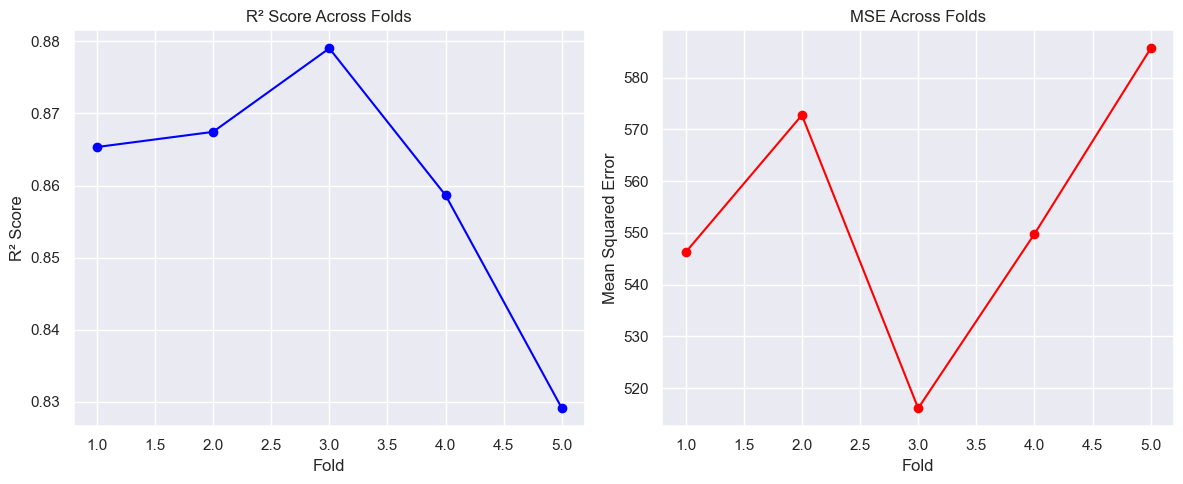

In [32]:
# ------------------- Step 7: R² and MSE Plot -------------------
folds = np.arange(1, 6)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(folds, r2_scores, marker='o', color='blue')
plt.title("R² Score Across Folds")
plt.xlabel("Fold")
plt.ylabel("R² Score")

plt.subplot(1, 2, 2)
plt.plot(folds, mse_scores, marker='o', color='red')
plt.title("MSE Across Folds")
plt.xlabel("Fold")
plt.ylabel("Mean Squared Error")

plt.tight_layout()
plt.show()

In [36]:
print(f"\nAverage R² Score: {r2_scores.mean():.3f}")
print(f"Average MSE: {mse_scores.mean():.3f}")


Average R² Score: 0.860
Average MSE: 554.125


In [33]:

# ------------------- Step 8: Predict on New Data -------------------
new_data = pd.DataFrame({
    'ENGINESIZE': [2.2, 1.6, 3.0],
    'CYLINDERS': [4, 4, 6],
    'FUELCONSUMPTION_COMB': [8.6, 6.5, 10.5]
})

new_data['Predicted_CO2EMISSIONS'] = Fuel_pred.predict(new_data)
print("\nPrediction on New Data:\n", new_data)



Average R² Score: 0.860
Average MSE: 554.125

Prediction on New Data:
    ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  Predicted_CO2EMISSIONS
0         2.2          4                   8.6              201.692145
1         1.6          4                   6.5              175.028174
2         3.0          6                  10.5              243.640487
